#                   Handwritten digits classification using neural network

In [109]:
import warnings
warnings.filterwarnings('ignore')

#### Divide the dataset into training and testing set.

In [110]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [111]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

### Normalization is performed to scale the pixel values.

In [112]:
x_train = x_train / 255
x_test = x_test / 255

 ### Image shape is (28,28) i.e. 2D array. We will flatten it into 1D array by resizing it.

In [113]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Reshape, Input

in_layer= Input((28,28))
flat=Reshape((784,))(in_layer)

d1=Dense(units=500,activation="relu")(flat)   # In Dense layer all the neurons on one layer is connected to all the neurons in the second layer 
d2=Dense(units=100,activation="relu")(d1)      
d3=Dense(units=10,activation="sigmoid")(d2)   # Sigmoid converts input between the range of 0 and 1.  


In [114]:
model=Model(in_layer,d3)

In [115]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_2 (Reshape)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 100)               50100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443610 (1.69 MB)
Trainable params: 443610 (1.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [117]:
y_train.shape

(60000,)

In [118]:
model.fit(x_train,y_train,epochs=10,batch_size=1000)

Epoch 1/10
60/60 [==============================] - 2s 17ms/step - loss: 0.5111 - accuracy: 0.8624
Epoch 2/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1801 - accuracy: 0.9493
Epoch 3/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1276 - accuracy: 0.9638
Epoch 4/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0955 - accuracy: 0.9727
Epoch 5/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0742 - accuracy: 0.9787
Epoch 6/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0600 - accuracy: 0.9827
Epoch 7/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0485 - accuracy: 0.9863
Epoch 8/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0382 - accuracy: 0.9896
Epoch 9/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0310 - accuracy: 0.9918
Epoch 10/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0252 - accuracy: 0.9936


In [119]:
predicted=model.predict(x_test[:1]) 
predicted

1/1 [==============================] - 0s 67ms/step


array([[1.2979327e-01, 1.6323529e-02, 5.7677156e-01, 9.6005541e-01,
        1.2453598e-03, 1.8462652e-01, 1.1786981e-05, 9.9998116e-01,
        1.1256861e-01, 7.1793747e-01]], dtype=float32)

### argmax gives the index of the maximum value 

In [120]:
import numpy as np
np.argmax(predicted)  # Result

7

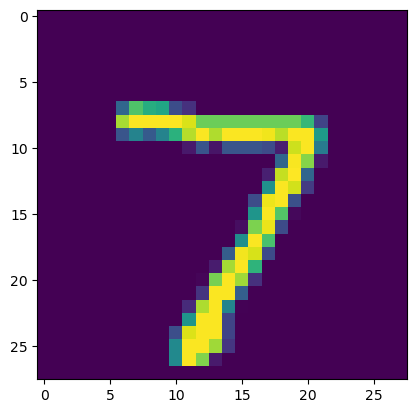

In [121]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

In [122]:
y_predicted= model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [123]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [124]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9797


[0.06456021964550018, 0.9797000288963318]

In [125]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

### Confusion Matrix

In [126]:
import tensorflow as tf
matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   0, 1123,    3,    2,    0,    0,    2,    1,    4,    0],
       [   4,    1, 1013,    3,    1,    0,    1,    4,    5,    0],
       [   0,    0,    3,  997,    0,    1,    0,    4,    3,    2],
       [   2,    0,    2,    1,  955,    0,    4,    3,    1,   14],
       [   3,    0,    0,   10,    2,  864,    4,    1,    5,    3],
       [   6,    3,    0,    1,    4,    5,  937,    0,    2,    0],
       [   0,    2,    8,    1,    1,    0,    0, 1008,    1,    7],
       [   3,    1,    3,    8,    4,    2,    1,    6,  941,    5],
       [   2,    2,    0,    6,    5,    2,    0,    4,    0,  988]])>

Text(95.72222222222221, 0.5, 'Truth')

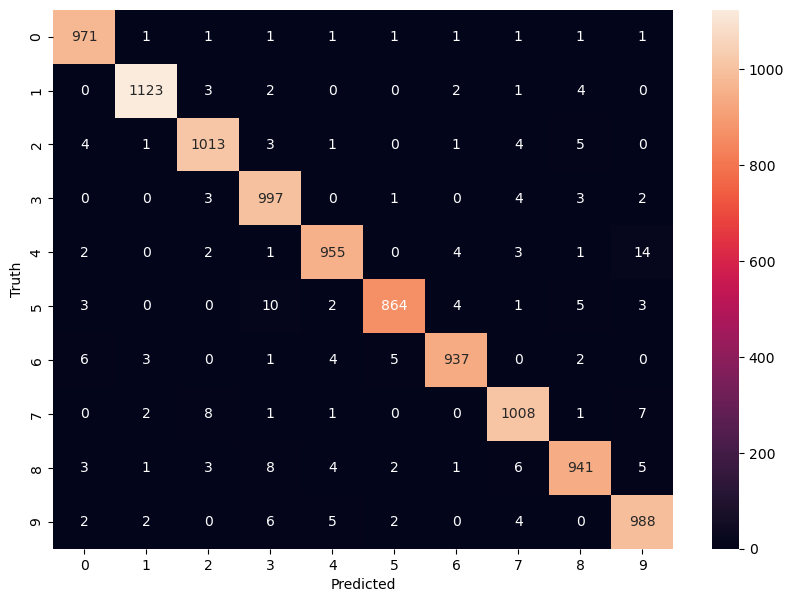

In [127]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Accuracy: 98%

In [128]:
from tensorflow.keras.preprocessing.image import load_img
img=load_img(r"C:\Users\Dell\downloads\WhatsApp Image 2023-04-10 at 9.37.05 PM.jpeg",grayscale=True, target_size=(28,28))

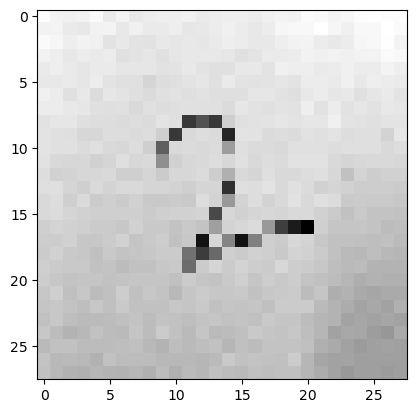

In [129]:
plt.imshow(img,cmap='gray')

### INVERT THE IMAGE

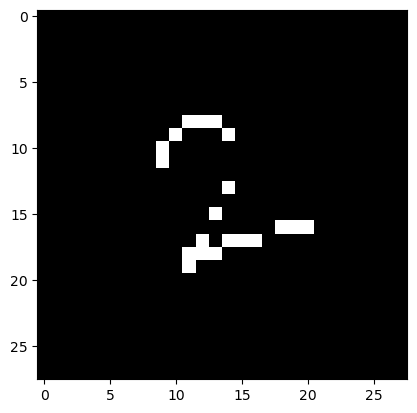

In [130]:
arr=np.array(img)
inv=((255-arr)>150)*255     # Make everything white(255) if it is greater than 150, else Black(0).     
plt.imshow(inv,cmap='gray')

In [131]:
model.predict(np.array([inv])).argmax(axis=1)

1/1 [==============================] - 0s 56ms/step


array([2], dtype=int64)

### -----------------------------------------------------------------------END-------------------------------------------------------------------------------